In [2]:
import pystan
import numpy as np
import numpy.random as rd
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation as ani
import matplotlib.cm as cm
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)

import statsmodels.api as sm
from scipy import signal

import plotly
plotly.offline.init_notebook_mode(connected=False)

from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:

pd.set_option("display.max_rows", 10000)
pd.set_option("display.max_columns", 10000)

In [8]:
akan = pd.read_csv("../data/akan.csv")
ooyama = pd.read_csv("../data/ooyama.csv")
aso =  pd.read_csv("../data/aso.csv")
isesima =  pd.read_csv("../data/isesima.csv")
towada =  pd.read_csv("../data/towada.csv")
nikko =  pd.read_csv("../data/nikko.csv")
kirisima =  pd.read_csv("../data/kirisima.csv")
kerama =  pd.read_csv("../data/kerama.csv")

In [10]:
x = akan["datetime"]
akan_y = akan["visitors"]
aso_y = aso["visitors"]
isesima_y = isesima["visitors"]
ooyama_y = ooyama["visitors"]
kirisima_y = kirisima["visitors"]
kerama_y = kerama["visitors"]
towada_y = towada["visitors"]
nikko_y = nikko["visitors"]

In [17]:
#折れ線
data_plot = [
    plotly.graph_objs.Scatter(x=x, y=akan_y, name="akan"),
    plotly.graph_objs.Scatter(x=x, y=aso_y, name="aso"),
    plotly.graph_objs.Scatter(x=x, y=isesima_y, name="isesima"),
  plotly.graph_objs.Scatter(x=x, y=ooyama_y, name="ooyama"),
    plotly.graph_objs.Scatter(x=x, y=kirisima_y, name="kirisima"),
    plotly.graph_objs.Scatter(x=x, y=kerama_y, name="kerama"),
    plotly.graph_objs.Scatter(x=x, y=towada_y, name="towada"),
    plotly.graph_objs.Scatter(x=x, y=nikko_y, name="nikko"),
]

layout = plotly.graph_objs.Layout(
    title="visitors",
    xaxis={"title":"date"},
    yaxis={"title":"visitors"},
)

fig = plotly.graph_objs.Figure(data=data_plot, layout=layout)
plotly.offline.iplot(fig)

In [23]:
#ヒストグラム
data_plot = [
    plotly.graph_objs.Histogram(x=akan_y,name="akan"),
    plotly.graph_objs.Histogram(x=aso_y,name="aso"),
     plotly.graph_objs.Histogram(x=isesima_y,name="isesima"),
     plotly.graph_objs.Histogram(x=ooyama_y,name="ooyama"),
     plotly.graph_objs.Histogram(x=kirisima_y,name="kirisima"),
     plotly.graph_objs.Histogram(x=kerama_y,name="kerama"),
     plotly.graph_objs.Histogram(x=towada_y,name="towada"),
     plotly.graph_objs.Histogram(x=nikko_y,name="nikko"),
    
]

layout = plotly.graph_objs.Layout(
    title="visitors",
    xaxis={"title":"date"},
    yaxis={"title":"visitors"},
)

fig = plotly.graph_objs.Figure(data=data_plot, layout=layout)
plotly.offline.iplot(fig)

In [33]:
#hist subplot
fig = tools.make_subplots(rows=1, cols=8)
i = 0
for plot in data_plot:
    i +=1
    fig.append_trace(plot,1,i)
plotly.offline.iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]  [ (1,4) x4,y4 ]  [ (1,5) x5,y5 ]  [ (1,6) x6,y6 ]  [ (1,7) x7,y7 ]  [ (1,8) x8,y8 ]



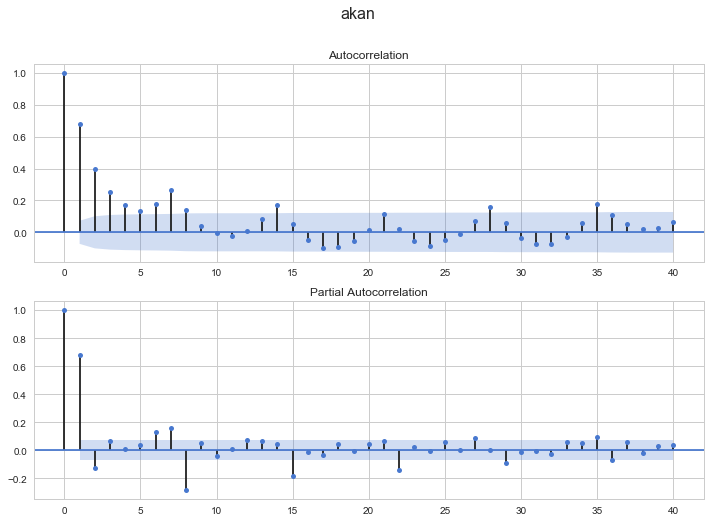

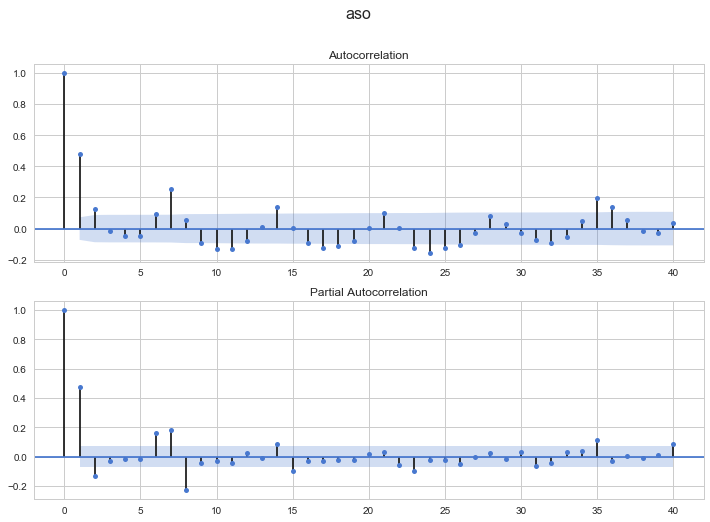

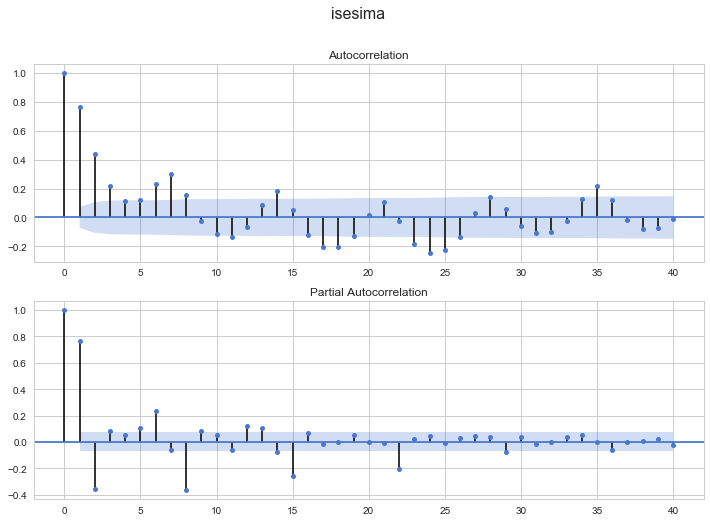

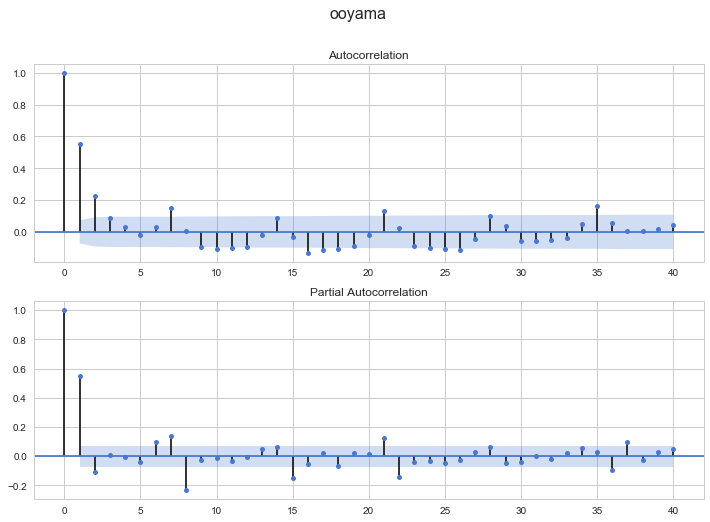

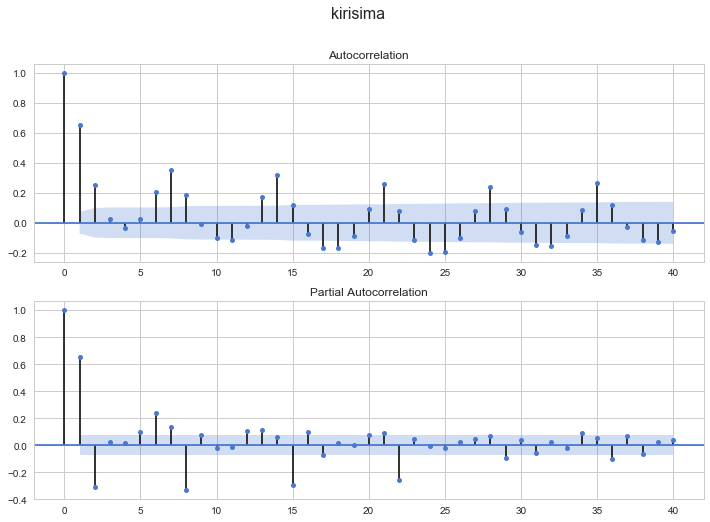

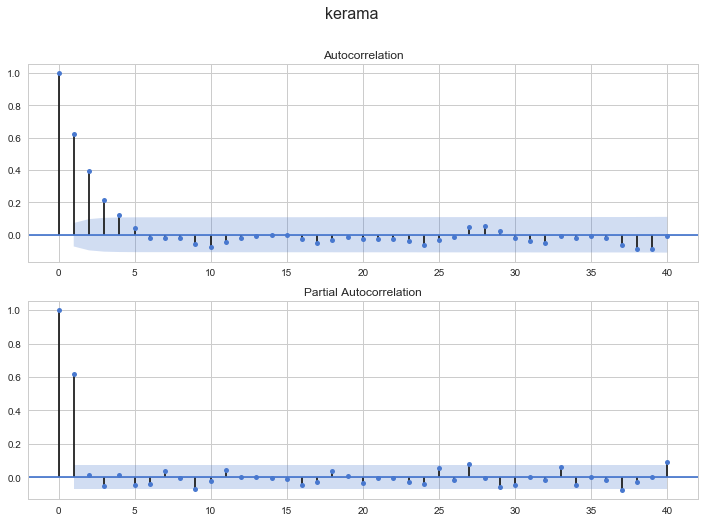

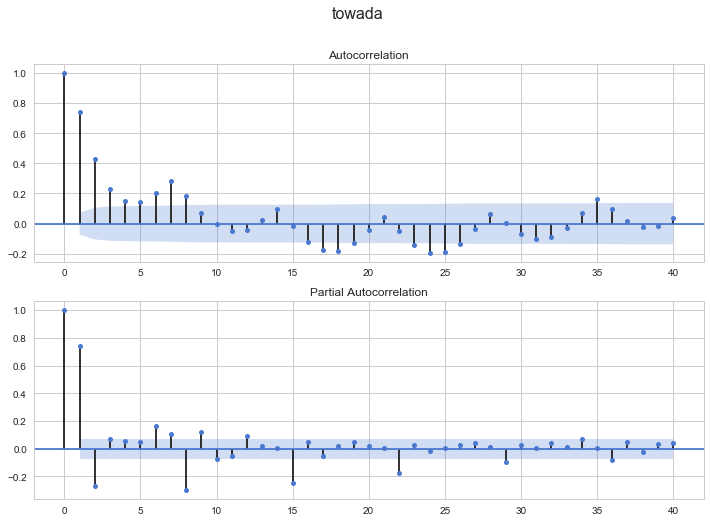

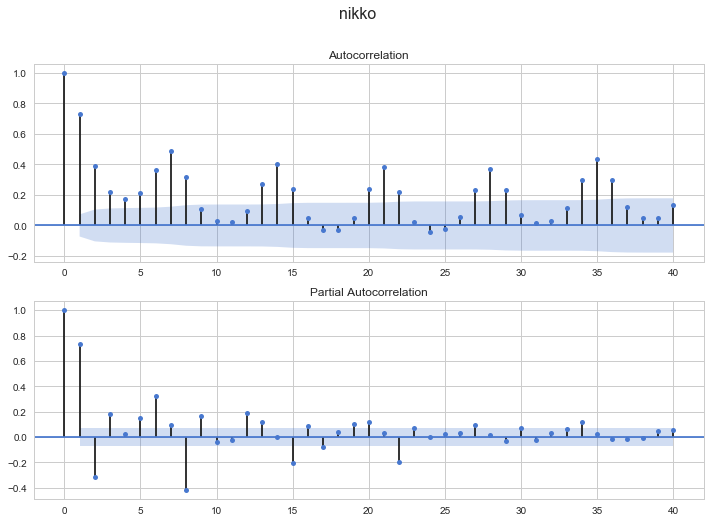

In [38]:
data = pd.concat((akan["visitors"],aso["visitors"],isesima["visitors"],ooyama["visitors"],kirisima["visitors"],kerama["visitors"],towada["visitors"],nikko["visitors"]), axis=1)
data.columns = ["akan","aso","isesima","ooyama", "kirisima","kerama","towada","nikko"]

for _,ts in data.iteritems():
#自己相関
    ts_acf = sm.tsa.stattools.acf(ts, nlags=40)
    #print("ts_acf:",ts_acf)

# 偏自己相関
    ts_pacf = sm.tsa.stattools.pacf(ts, nlags=40, method='ols')
    #print("ts_pacf:",ts_pacf)
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(ts, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(ts, lags=40, ax=ax2)
    fig.suptitle(ts.name, fontsize=16)


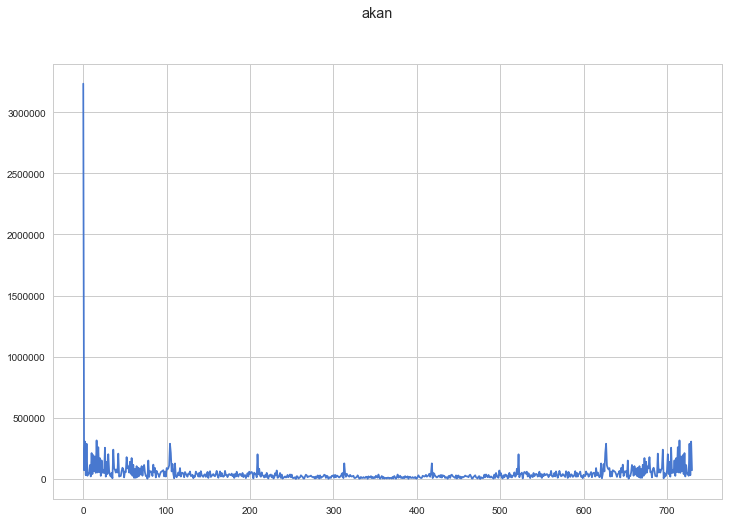

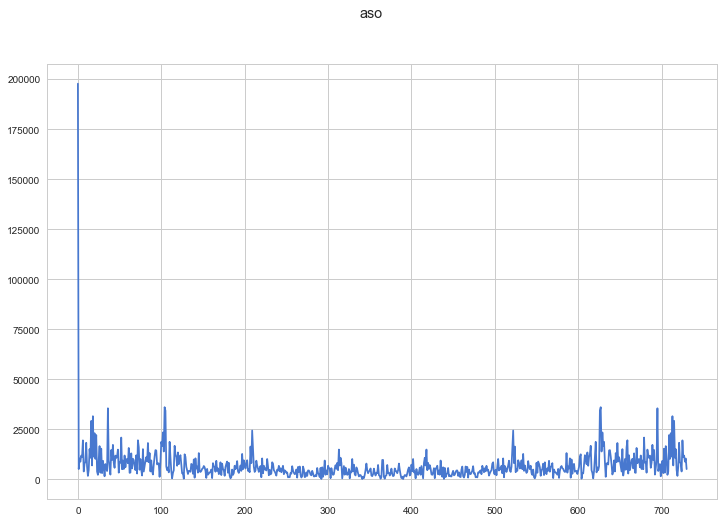

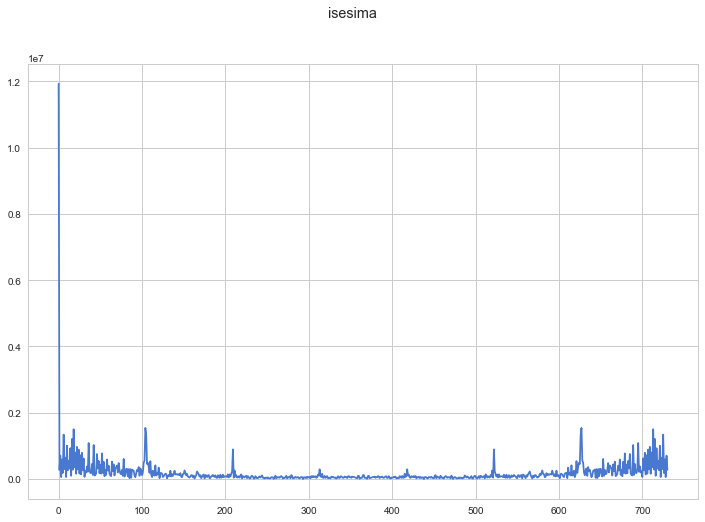

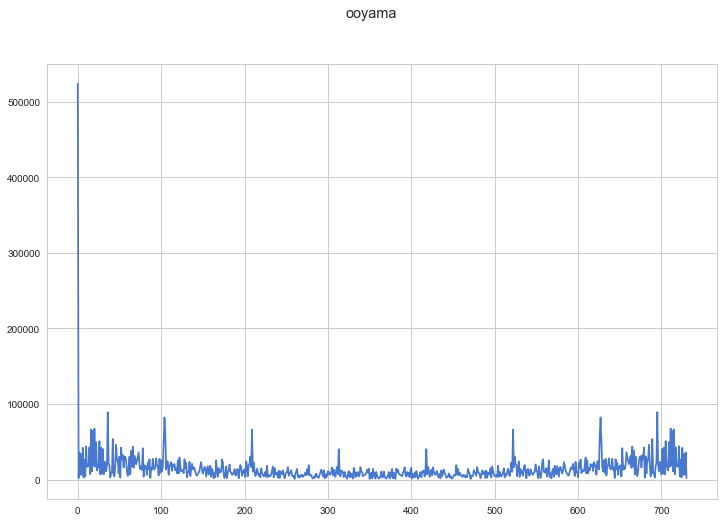

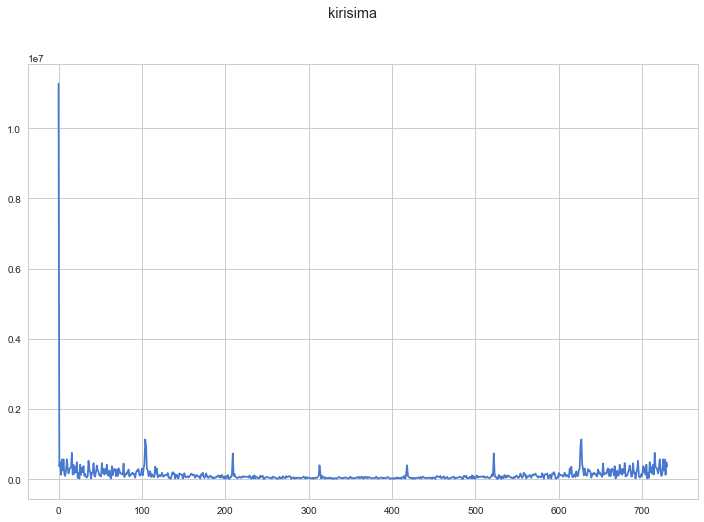

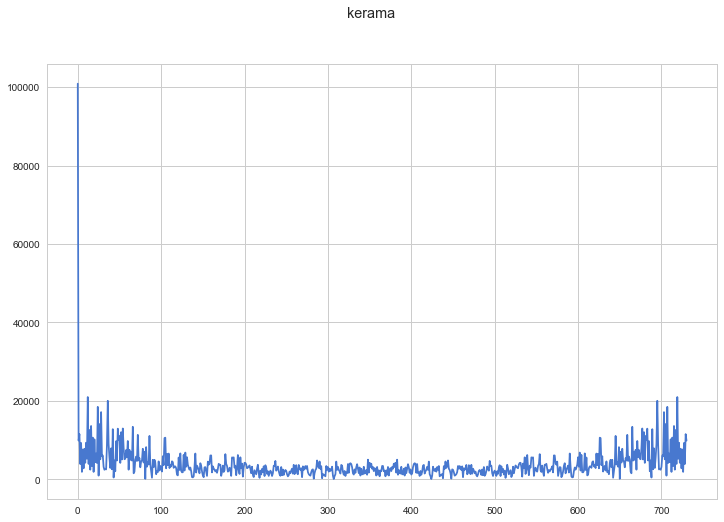

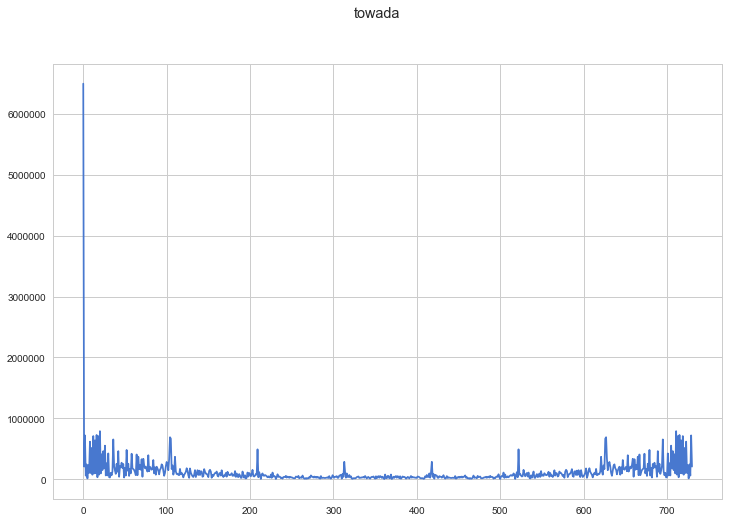

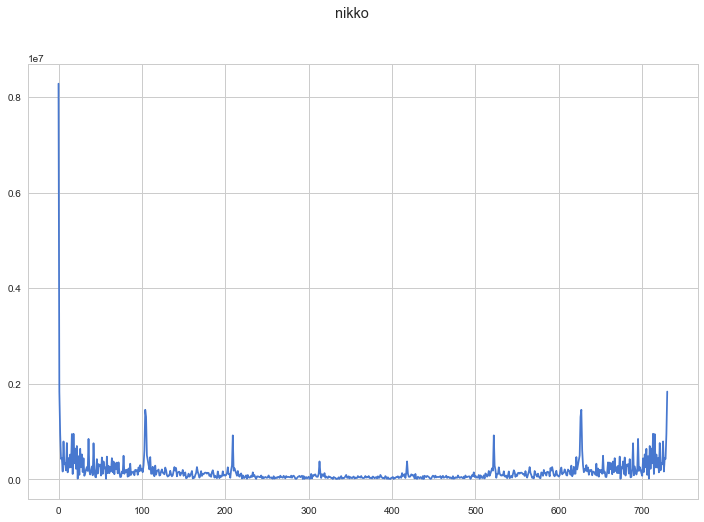

In [39]:
#周波数領域
#https://momonoki2017.blogspot.com/2018/03/pythonfft-1-fft.html
for _,f in data.iteritems():
    F = np.fft.fft(f)
    F_abs = np.abs(F)
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(111)
    ax1.plot(F_abs)
    fig.suptitle(f.name)

# weather

In [14]:
weather = pd.read_csv("../data/weather.tsv",delimiter="\t")
print(weather.shape)
weather.head(20)

(13140, 24)


年月日   地点  平均気温(℃)  最高気温(℃)  最低気温(℃)  降水量の合計(mm)  10分間降水量の最大(mm)  \
0    2015/1/1  十和田     -1.9      0.3     -2.9         5.0             1.0   
1    2015/1/2  十和田     -3.9     -1.1     -8.0         0.0             0.0   
2    2015/1/3  十和田     -4.0     -1.6     -8.9         2.0             0.5   
3    2015/1/4  十和田      0.6      3.4     -1.6         0.0             0.0   
4    2015/1/5  十和田      0.8      5.4     -5.1         0.0             0.0   
5    2015/1/6  十和田      2.0      7.9     -3.1         0.0             0.0   
6    2015/1/7  十和田     -3.7     -1.2     -5.5         0.0             0.0   
7    2015/1/8  十和田      0.2      2.2     -1.4         0.0             0.0   
8    2015/1/9  十和田     -0.2      2.4     -3.9         0.5             0.5   
9   2015/1/10  十和田     -0.5      1.8     -2.1         0.0             0.0   
10  2015/1/11  十和田     -1.0      1.7     -5.5         0.0             0.0   
11  2015/1/12  十和田      1.4      4.6     -4.5         0.0             0.0   
12  2015/1/13  十和田      1.6      3.8      0.1         0.0             0.0   
13  2015/1/14  十和田      2.7      7.0     -4.2         0.0             0.0   
14  2015/1/15  十和田      1.6      5.4     -1.5         0.0             0.0   
15  2015/1/16  十和田      1.3      4.8     -0.8         0.0             0.0   
16  2015/1/17  十和田     -2.4      4.2     -7.3         0.0             0.0   
17  2015/1/18  十和田     -3.1     -1.1     -5.3         0.0             0.0   
18  2015/1/19  十和田     -1.7      1.6     -3.7         0.5             0.5   
19  2015/1/20  十和田     -4.9     -2.3    -15.3         3.0             0.5   

    日照時間(時間)  合計全天日射量(MJ/㎡)  最深積雪(cm)  降雪量合計(cm)  平均風速(m/s)  最大風速(m/s)  \
0        2.1            NaN      18.0       22.0        2.8        7.5   
1        3.3            NaN      17.0        0.0        2.2        6.1   
2        1.4            NaN      21.0        9.0        2.3        6.1   
3        2.6            NaN      19.0        1.0        1.6        5.8   
4        4.0            NaN      14.0        0.0        1.5        4.4   
5        1.2            NaN      10.0        0.0        3.0        8.1   
6        4.2            NaN      11.0        6.0        5.8        9.6   
7        1.8            NaN       9.0        4.0        4.3        8.0   
8        2.3            NaN      13.0        6.0        3.1        6.1   
9        4.7            NaN      10.0        1.0        4.1        9.0   
10       5.5            NaN      10.0        0.0        2.9        6.7   
11       4.9            NaN      10.0        2.0        4.2        7.8   
12       4.9            NaN       8.0        0.0        4.0        7.6   
13       8.2            NaN       7.0        0.0        2.2        5.8   
14       0.0            NaN       5.0        0.0        1.4        3.1   
15       1.7            NaN       5.0        0.0        2.1        5.3   
16       4.3            NaN       9.0        6.0        4.4       11.1   
17       0.9            NaN      14.0        7.0        3.6        9.0   
18       1.7            NaN      13.0        3.0        1.7        6.2   
19       2.6            NaN      26.0       17.0        3.3        6.9   

    最大瞬間風速(m/s) 最多風向(16方位)  平均蒸気圧(hPa)  平均現地気圧(hPa)  平均湿度(%)  平均海面気圧(hPa)  \
0          13.0        西南西         NaN          NaN      NaN          NaN   
1           9.6        西北西         NaN          NaN      NaN          NaN   
2          10.2        西南西         NaN          NaN      NaN          NaN   
3          10.0         南西         NaN          NaN      NaN          NaN   
4           7.4        西南西         NaN          NaN      NaN          NaN   
5          13.7          西         NaN          NaN      NaN          NaN   
6          16.9        西南西         NaN          NaN      NaN          NaN   
7          13.5          西         NaN          NaN      NaN          NaN   
8          10.2          西         NaN          NaN      NaN          NaN   
9          13.5        西南西         NaN          NaN      NaN       

In [15]:
weather["地点"].unique()

array(['十和田', '大山', '大田', '日光', '渡嘉敷', '熊本', '釧路', '青森', '高森', '鳥羽',
       '鹿児島', '鹿角'], dtype=object)

In [17]:
locations = weather["地点"].unique()
weather_dict = {}
for location in locations:
    weather_dict[location] = weather.loc[weather["地点"]==location,:]

In [29]:
weather_dict["高森"].columns

Index(['年月日', '地点', '平均気温(℃)', '最高気温(℃)', '最低気温(℃)', '降水量の合計(mm)',
       '10分間降水量の最大(mm)', '日照時間(時間)', '合計全天日射量(MJ/㎡)', '最深積雪(cm)', '降雪量合計(cm)',
       '平均風速(m/s)', '最大風速(m/s)', '最大瞬間風速(m/s)', '最多風向(16方位)', '平均蒸気圧(hPa)',
       '平均現地気圧(hPa)', '平均湿度(%)', '平均海面気圧(hPa)', '最小相対湿度(%)', '最低海面気圧(hPa)',
       '平均雲量(10分比)', '天気概況(昼:06時~18時)', '天気概況(夜:18時~翌日06時)'],
      dtype='object')